# Problem 1: Numpy Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()

We begin by defining the variables for our implemenation. Note that this enire notebook was obtained from our usual [repository](https://github.com/ubsuny/CompPhys/tree/main/RandomNumbers):

In [2]:
n_walkers = 100
n_steps = 5000
t = np.arange(n_steps)

## 1 Dimension

Let's start by plotting a random walk for 1 dimension:

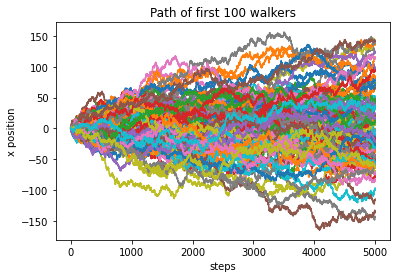

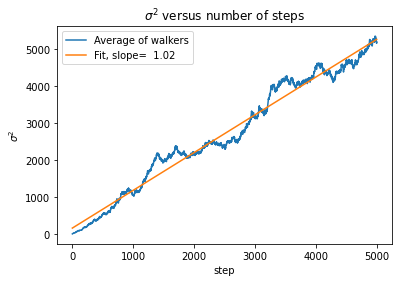

Diffusion coefficient = 0.5114113877112948
Percentage error = 2.282277542258959 %


In [3]:
dims = 1

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers, n_steps,dims)

# These are the steps at each stage
steps = rng.choice(a=step_set, size=step_shape)

# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1)

# Now get the averages over the walkers
x2 = np.average(x**2, axis=0)
x4 = np.average(x**4, axis=0)
sigma2_nd = np.sqrt(x4 - x2**2)
sigma2 = np.sum(sigma2_nd, axis=1)

for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1 )
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/2)
print('Percentage error =', np.abs(res[0]/2 - 0.5) * (100/0.5), '%')

From these two graphs we can draw a lot of conclusion; the top graph shows the paths taken by the walkers in the x-axis as a function of the steps taken, while the bottom one shows the linear relation between the time rate of change and the second spatial derivative of the probability function. The slope of this graph divided by 2 gives the diffusion coefficient D in 1 dimension. As we can see, we get fairly accurate results with this simulation.

## 2 Dimensions

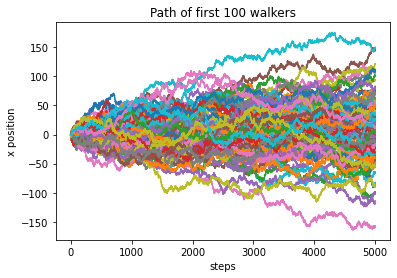

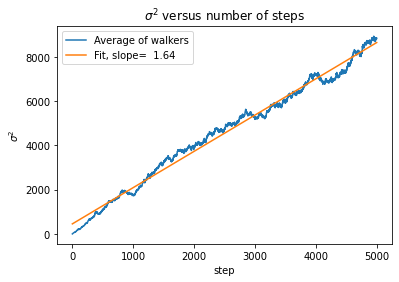

Diffusion coefficient = 0.4095709923865344
Percentage error = 18.085801522693124


In [4]:
dims = 2

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers, n_steps,dims)

# These are the steps at each stage
steps = rng.choice(a=step_set, size=step_shape)

# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1)

# Now get the averages over the walkers
x2 = np.average(x**2, axis=0)
x4 = np.average(x**4, axis=0)
sigma2_nd = np.sqrt(x4 - x2**2)
sigma2 = np.sum(sigma2_nd, axis=1)

for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1 )
plt.plot(t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0])
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/4 )
print('Percentage error =', np.abs(res[0]/4 - 0.5) * (100/0.5))

## 3 Dimensions

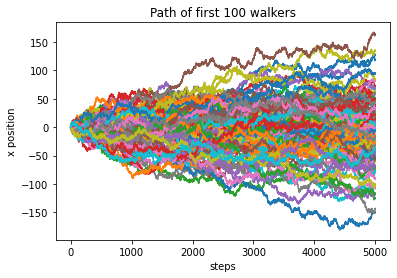

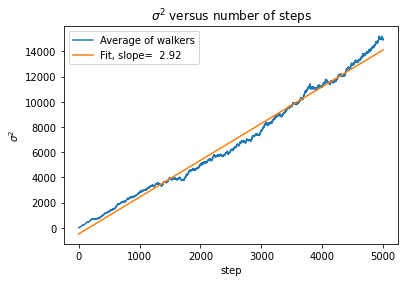

Diffusion coefficient = 0.4870980163488863
Percentage error = 2.580396730222745


In [5]:
dims = 3

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers, n_steps,dims)

# These are the steps at each stage
steps = rng.choice(a=step_set, size=step_shape)

# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1)

# Now get the averages over the walkers
x2 = np.average(x**2, axis=0)
x4 = np.average(x**4, axis=0)
sigma2_nd = np.sqrt(x4 - x2**2)
sigma2 = np.sum(sigma2_nd, axis=1)

for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1 )
plt.plot(t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0])
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/6 )
print('Percentage error =', np.abs(res[0]/6 - 0.5) * (100/0.5))

From these results we see that the ratio between the slope and the dimensionality of each graph is a constant. This is precisely the diffusion coefficient D, and is what we expect from kinetic theory.